In [3]:
import os
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")


from langchain_groq import ChatGroq
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
model=ChatGroq(model="qwen/qwen3-32b")

In [4]:
# from tavily import TavilyClient
# client = TavilyClient(api_key=os.environ["TAVILY_API_KEY"])
# response = client.search(
#     query="What are latest updates in NVIDIA ?",
#     include_answer="basic",
#     search_depth="advanced"
# )
# print(response)

In [5]:
from langchain_tavily import TavilySearch

tavily_search_tool = TavilySearch(
    max_results=5,
    topic="general",
)

tavily_search_tool.invoke("Current AI Tools")
# for item in tavily_search_tool.invoke("Current AI Tools"):
# for item in tavily_search_tool.invoke("Current AI Tools")["results"]:
#     print(item['title'])

c:\Users\hghar\OneDrive\Desktop\Python-LangChain\.venv\lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "output_schema" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]
c:\Users\hghar\OneDrive\Desktop\Python-LangChain\.venv\lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "stream" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]


{'query': 'Current AI Tools',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.synthesia.io/post/ai-tools',
   'title': 'The 45 Best AI Tools in 2026 (Tried & Tested) - Synthesia',
   'content': 'An in-depth guide to the 45 best AI tools including the best AI assistants, video generators, automation tools, app builders, and more.',
   'score': 0.67140645,
   'raw_content': None},
  {'url': 'https://aitoolsdirectory.com/',
   'title': 'AI Tools Directory',
   'content': "The world's best curated list of AI Tools · Featured Tool: Base44 · Featured Tool: Uncensored · Flowith · ThumbnailCreator · PDF Translator · Image Translator",
   'score': 0.6353361,
   'raw_content': None},
  {'url': 'https://zapier.com/blog/best-ai-productivity-tools/',
   'title': 'The best AI productivity tools in 2026 - Zapier',
   'content': 'AI orchestration and automation (Zapier). Chatbots (ChatGPT, Claude, Meta AI). AI agent builders (Zapier Agents, Botpress). Se

In [6]:
from langchain.tools import tool
@tool("calculator",description="Perform arithmetic Calculations.Use this for any math problems")
def calc(expression:str)->str:
    """Evaluate the arithmetical expression"""
    return str(eval(expression))

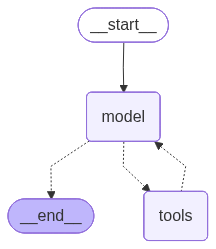

In [7]:
from langchain.agents import create_agent
agent=create_agent(model,[tavily_search_tool,calc])
agent

In [8]:
user_input = "What the current news about anthropic and what 5+5"
for step in agent.stream(
    {"messages":user_input},
    # stream_mode='response'
    stream_mode='values'
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What the current news about anthropic and what 5+5
================================== Ai Message ==================================
Tool Calls:
  tavily_search (qxe4jaxx7)
 Call ID: qxe4jaxx7
  Args:
    query: current news about anthropic
    search_depth: advanced
    time_range: week
    topic: news
  calculator (na5tyqv8g)
 Call ID: na5tyqv8g
  Args:
    expression: 5+5
================================= Tool Message =================================
Name: calculator

10
================================== Ai Message ==================================

Here's the information you requested:

**Current News About Anthropic:**
1. **Travelers Insurance Partnership** (Yahoo Finance)  
   - Travelers is collaborating with Anthropic to integrate Claude AI into their operations, alongside rolling out an in-house AI platform (TravAI) for 30,000+ employees. This aims to improve data analysis, underwriting, and ri